In [ ]:
#!pip3 install seaborn
#!pip3 install plotly
#!pip3 install wordcloud
#!pip3 install sklearn

#### Necessary Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor, LogisticRegression

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(r"./datasets/Instagram data.csv", encoding = 'latin1')

#### Exploratory Data Analysis (EDA)

In [ ]:
data.isnull().sum() # Checking for null values 
data = data.dropna()
data.info()

##### Impressions Density From Home

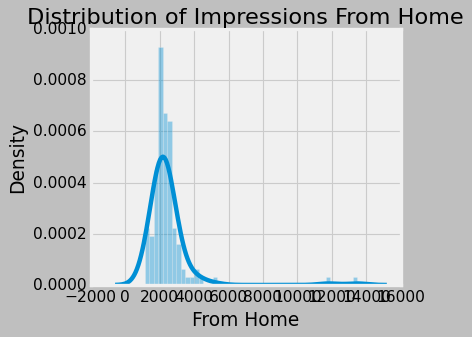

In [69]:
plt.figure(figsize=(5, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

##### Impressions Density From Hashtags

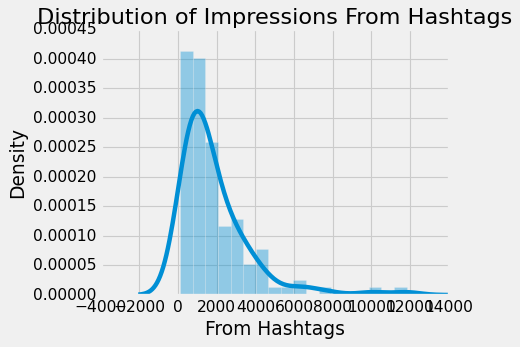

In [70]:
plt.figure(figsize=(5, 4))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

##### Impressions Density From Explore

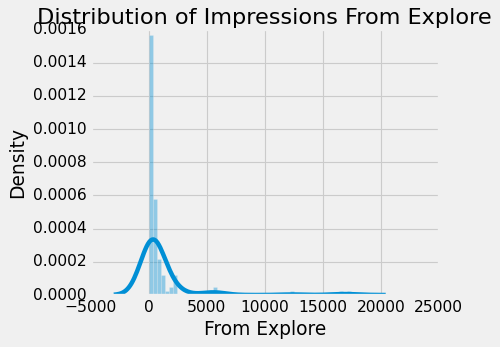

In [71]:
plt.figure(figsize=(5, 4))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

##### Overall Percentages of Impressions

In [72]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

##### Analyzing Content

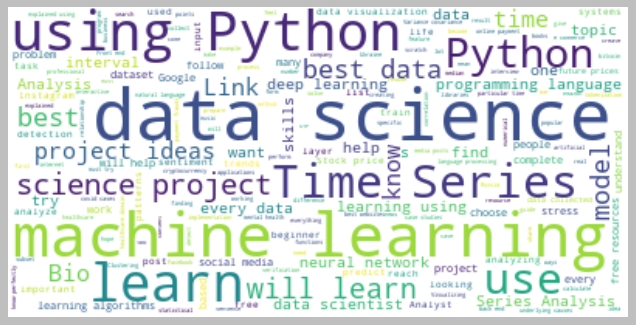

In [73]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

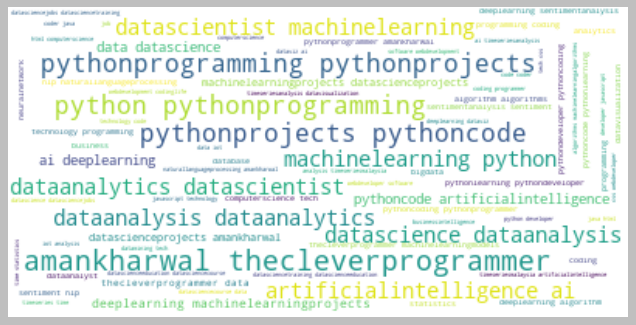

In [74]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Analyzing Relationships

In [75]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [76]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [77]:
correlation = data.corr()
#print(correlation["Impressions"].sort_values(ascending=False))
#correlation

In [78]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [79]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

#### Machine Learning on Impressions

In [80]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

##### Passive Agressive Regressor

In [83]:
pa = PassiveAggressiveRegressor()
pa.fit(xtrain, ytrain)
print(f"Accuracy is: {pa.score(xtest, ytest)}")

Accuracy is: 0.7769507698306762


In [84]:
# Predicting
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12791.9494238])

##### Logistic Regression Classifier

In [82]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
print(f"Accuracy is: {lr.score(xtest, ytest)}")

Accuracy is: 0.25


###### Credits: https://thecleverprogrammer.com/2022/03/22/instagram-reach-analysis-using-python/